# Problem Statement

## Description

**Background:**

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

**Objective:**

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.
You are expected to perform the statistical analysis to answer the following questions:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5.	Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

**Data Dictionary:**
1.	user_id - This represents the user ID of the person visiting the website.
2.	group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3.	landing_page - This represents whether the landing page is new or old.
4.	time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5.	converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6.	language_preferred - This represents the language chosen by the user to view the landing page.

# Importing all the required libraries

In [56]:
# Libraries required for data analysis and visualisation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)   # adds background to the graph

# Library required for statistical analysis

import scipy.stats as stats

In [57]:
# Library required to suppress any warning messages

import warnings
warnings.filterwarnings('ignore')

In [58]:
# Creating an array of color codes to use in this project

colors = ['#4178FB','#4DE0FA','#7DFFC6']

# Setting custom color palette

sns.set_palette(sns.color_palette(colors))

# Loading the dataset

In [59]:
data = pd.read_csv('../input/enews-express/abtest.csv')

# Data Structure Analysis

In [60]:
# viewing 10 random observations from the dataset

data.sample(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
81,546449,treatment,new,5.26,yes,French
21,546584,control,old,7.03,yes,Spanish
55,546563,control,old,0.93,no,French
88,546447,treatment,new,3.30,no,French
61,546467,treatment,new,6.79,yes,French
4,546459,treatment,new,4.75,yes,Spanish
16,546443,treatment,new,8.73,no,English
58,546562,control,old,7.40,yes,French
98,546481,treatment,new,6.20,yes,Spanish
92,546566,control,old,8.35,no,French


* The sample data gives an idea about the contents of the dataset

In [61]:
# Checking the shape of the dataset

data.shape

(100, 6)

* There are 100 rows and 6 columns in the dataset

In [62]:
# Checking for any missing values

data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* No missing values in the dataset

In [63]:
# Viewing the overall information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* No missing values in the dataset
* There are 1 'int', 1 'float' and 4 'object' type columns
* Memory space utilised by the dataset is 4.8+ KB

In [64]:
# Converting 'object' datatypes to 'category' for further analysis

data['group'] = data['group'].astype('category')
data['landing_page'] = data['landing_page'].astype('category')
data['converted'] = data['converted'].astype('category')
data['language_preferred'] = data['language_preferred'].astype('category')

In [65]:
# Checking the datatypes

data.dtypes

user_id                      int64
group                     category
landing_page              category
time_spent_on_the_page     float64
converted                 category
language_preferred        category
dtype: object

* Now there are 4 'category', 1 'int' and 1 'float' type columns

In [66]:
# viewing the dataset information again

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


* Memory space utilisied is reduced to 2.5 KB

In [67]:
# Checking the statistical summary of the dataset

data.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,new,NaN,yes,French
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


* Unique values present in the categorical columns
* Frequency shows equal number of users for both new/old landing pages
* Spanish seems to be the highly preferred language among the 100 users
* Overall 54 users have become subscribers
* The mean and median time_spent_on_the_page are both equal suggesting a normal distribution

In [68]:
# checking for the unique values in the categorical columns

data['group'].unique()

['control', 'treatment']
Categories (2, object): ['control', 'treatment']

In [69]:
data['landing_page'].unique()

['old', 'new']
Categories (2, object): ['new', 'old']

In [70]:
data['converted'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [71]:
data['language_preferred'].unique()

['Spanish', 'English', 'French']
Categories (3, object): ['English', 'French', 'Spanish']

* group, landing_page has 2 unique values as stated in the problem definition
* converted has yes/no values
* language_preferred has 3 languages namely Spanish, English and French

# Exploratory Data Analysis

In [72]:
# Defining a method to print the percentage of data values in the plots

def bar_perc(plot, feature):
    total = len(feature)      # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)      # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05        # width of the plot
        y = p.get_y() + p.get_height()                  # height of the plot
        ax.annotate(percentage, (x, y), size = 12)      # annotate the percentage

## Univariate Analysis of data
**1. Group**

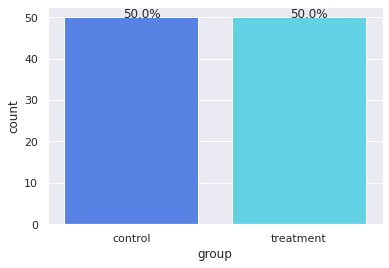

In [73]:
ax = sns.countplot(data['group'])   # creating a countplot and assigning that to a variable ax
bar_perc(ax, data['group'])         # calling the method bar_perc and passing ax as the argument to get the percentages 
                                    # labelled on the graph

* The control group and the treatment group both have 50 observations each, as stated in the problem definition

**2. Landing page**

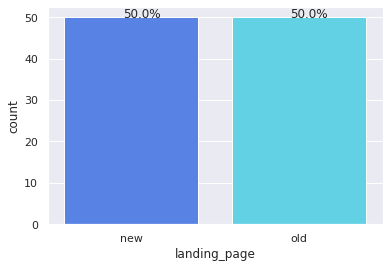

In [74]:
ax = sns.countplot(data['landing_page'])
bar_perc(ax, data['landing_page'])

* The number of visitors to the new and old landing pages are equal as mentioned in the problem statement

**3. Time spent on the page**

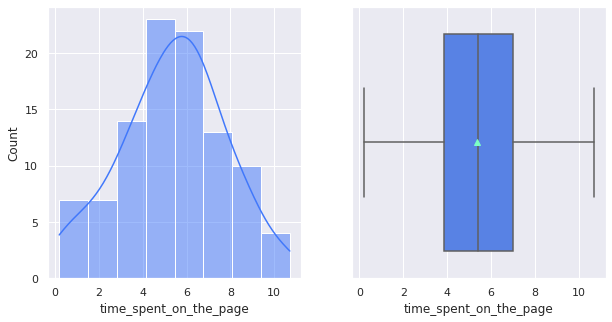

In [75]:
plt.figure(figsize = (10,5))       # defining the image size
plt.subplot(1,2,1)                 # specifying the placement of the 1st subplot
sns.histplot(data['time_spent_on_the_page'], kde = True)    # creating a histplot showing kde, as the 1st subplot
plt.subplot(1,2,2)                 # specifying the placement of the 2nd subplot
sns.boxplot(x = data['time_spent_on_the_page'], showmeans = True)  # creating a boxplot indicating mean, as the 2nd subplot
plt.show()                         # displaying both subplots

* Average time spent on the pages (both old and new) ranges anywhere between less than a minute to a little above 10 minutes
* Overall mean time spent is about 6 minutes

**4. Converted**

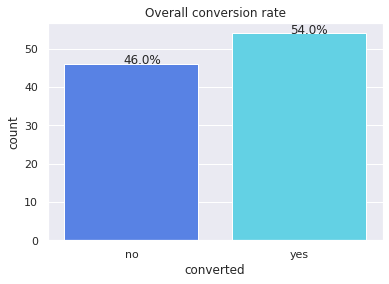

In [76]:
ax = sns.countplot(data['converted'])
plt.title('Overall conversion rate')
bar_perc(ax, data['converted'])

* Overall 54 out of 100 customers have subscribed to the news portal

**5. Language preferred**

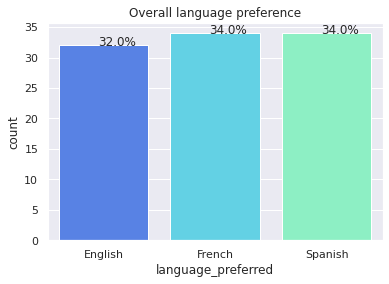

In [77]:
ax = sns.countplot(data['language_preferred'])
plt.title('Overall language preference')
bar_perc(ax, data['language_preferred'])

* French and Spanish are equally preferred by 34 users
* English is closely preferred by 32 users

## Bivariate Analysis

**1. Group vs Landing page**

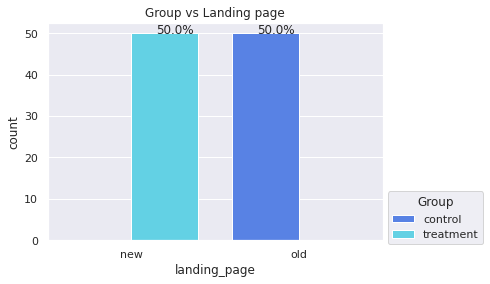

In [78]:
ax = sns.countplot(x = 'landing_page', data = data, hue = 'group' )
bar_perc(ax, data['landing_page'])
plt.title('Group vs Landing page')   # giving a title to the plot
plt.legend(title = 'Group',bbox_to_anchor = (1,0.25))  # specifying the title and position of the labels mentioned in the key
plt.show()   # displaying the plot

* The number of observations for both control and treatment groups are 50 each
* The number of observations for both the landing pages are 50 each

**2. Group vs Time spent on the page**

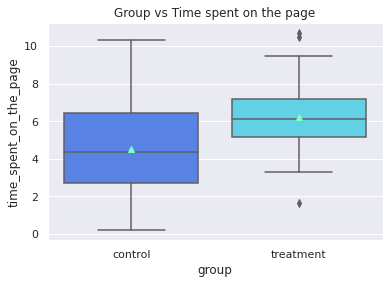

In [79]:
sns.boxplot(x = 'group', y = 'time_spent_on_the_page', data = data, showmeans = True)
plt.title('Group vs Time spent on the page')
plt.show()

**contol group**
* min time spent is close to 0 and max time spent is a little above 10 mins
* mean time is about 5 mins
* IQR is larger compared to the other group
* no outliers observed

**treatment group**
* min in time spent is around 3 mins and max time spent is a little above 9 mins
* mean time is around 6 mins
* IQR is between 5 to 7 mins
* outliers spotted on both the sides

**3. Group vs Converted**

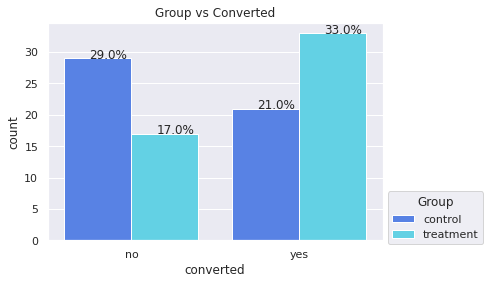

In [80]:
ax = sns.countplot(x = 'converted', data = data, hue = 'group')
bar_perc(ax, data['converted'])
plt.title('Group vs Converted')
plt.legend(title = 'Group', bbox_to_anchor = (1,0.25))
plt.show()

**control group**
* The number of users who converted is much less than those whose did not

**treatment group**
* The number of users who converted is much larger in this group comparatively

**4. Group vs Language preferred**

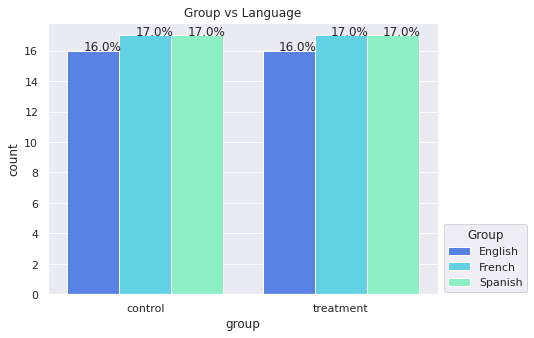

In [81]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'group')
bar_perc(ax, data['language_preferred'])
plt.title('Group vs Language')
plt.legend(title = 'Group', bbox_to_anchor = (1,0.28))
plt.show()

* The number of users for each of the languages is almost for both control and treatment groups

**5. Landing page vs Time spent**

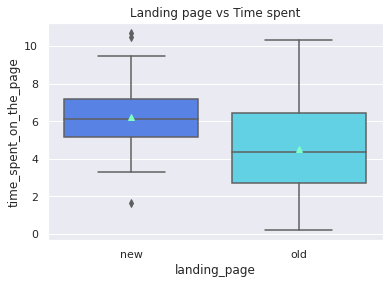

In [82]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data, showmeans = True)
plt.title('Landing page vs Time spent')
plt.show()

**New page**

* The minimum time spent is about 3 mins and maximum time spent is around 9 mins
* Outliers spotted on both sides
* The IQR is between 5 to 7 mins
* Mean time is around 6 mins and is equal to 50th percentile

**Old page**
* The minimum time spent is close to 0 and the maximum time spent is a little above 10 mins
* No outliers
* IQR is around 3 to 6 mins
* Mean is around 5 mins and it overlaps the 50th percentile

On an average, the time spent on the new landing page is higher comparatively.

**6. Landing page vs Converted**

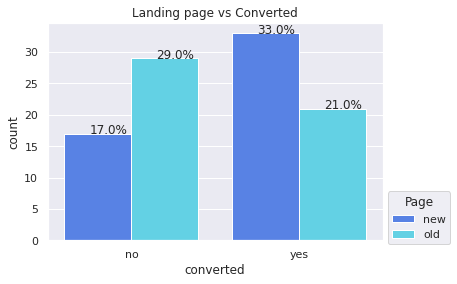

In [83]:
ax = sns.countplot(hue = 'landing_page', data = data, x = 'converted')
bar_perc(ax, data['converted'])
plt.title('Landing page vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.25))
plt.show()

**New page**

* 33 users have become subscribers ; 17 have not subscribed

**Old page**
* 21 users have subscribed to the webportal ; 29 have not subscribed

The average conversion rate is higher for the new landing page.

**7. Landing page vs Language preferred**

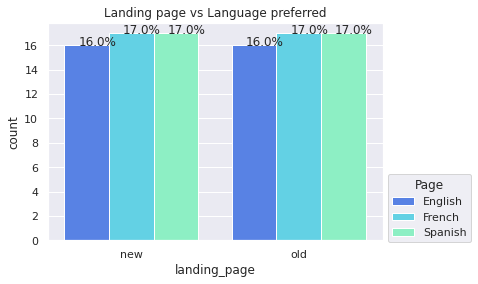

In [84]:
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'landing_page')
bar_perc(ax, data['language_preferred'])
plt.title('Landing page vs Language preferred')
plt.legend(title = 'Page',bbox_to_anchor = (1,0.33))
plt.show()

* The number of users for all three languages are equal for both new and old landing page

**8. Time spent vs Converted**

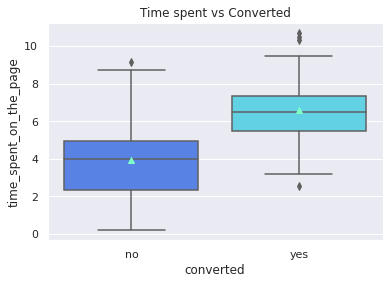

In [85]:
sns.boxplot(x = 'converted', y = 'time_spent_on_the_page', data = data, showmeans = True)
plt.title('Time spent vs Converted')
plt.show()

* It is evident that more the time spent by the user on the webportal, it is likely that he/she will get converted.

**9. Time spent vs Language preferred**

* The IQR of the time spent is almost same for both English and French, about 4 to 7 mins
* The IQR for Spanish is about 5 to 7 minutes
* Values of the mean time spent by different language users look quite close to one another
* Outliers spotted for Spanish alone

**10. Language preferred vs Converted**

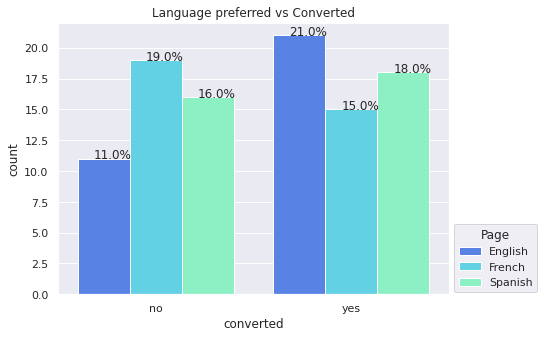

In [86]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'converted')
bar_perc(ax, data['converted'])
plt.title('Language preferred vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.28))
plt.show()

* the conversion rate of the users preferring English is the highest followed by Spanish and then French
* users preferring French seems to have the lowest conversion rate followed by Spanish and then English
* the conversion rate for Spanish is alomst 50 - 50

## User Segmentation

**1. Time spent vs Landing page vs Converted**

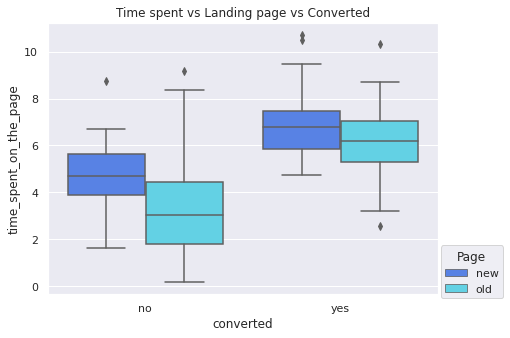

In [87]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'converted', y = 'time_spent_on_the_page', data = data, hue = 'landing_page' )
plt.title('Time spent vs Landing page vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1.18,0.20))
plt.show()

* The conversion rate is higher for the new landing page comparatively
* The average time spent is higher for the new landing page irrespective of the conversion status
* Irrespective of the landing page, if the user spents more time on the portal he/she is likely to become a subscriber.

**2. Time spent vs Landing page vs Language preferred**

<Figure size 504x360 with 0 Axes>

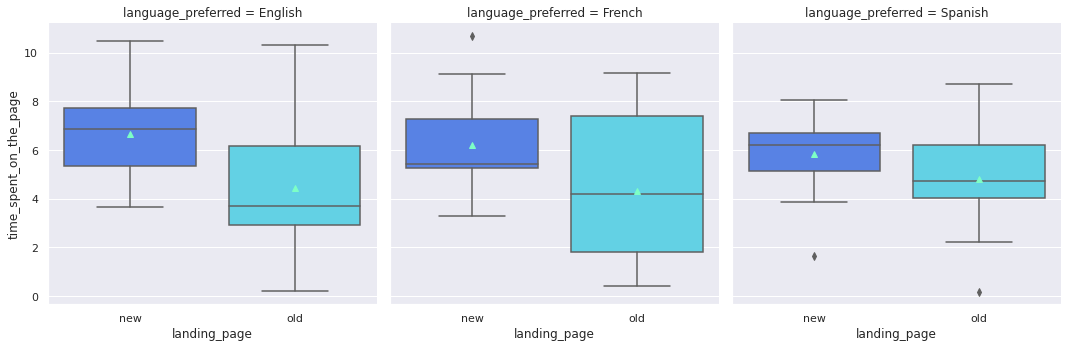

In [88]:
plt.figure(figsize = (7,5))
sns.catplot(x = 'landing_page', y = 'time_spent_on_the_page', col = 'language_preferred', data = data, kind = 'box', showmeans = True)
plt.show()   # creating a categorical plot arranged in columns based on language preferred ; 'kind' refers to the type of plot 

* The mean time spent on the new landing page for all three languages is between 6 to 7 mins
* The mean time spent on the old landing page for different languages is between 5 to 6 mins
* No outliers spotted for English language users for both new and old landing pages

**3. Group vs Time spent vs Converted**

<Figure size 360x216 with 0 Axes>

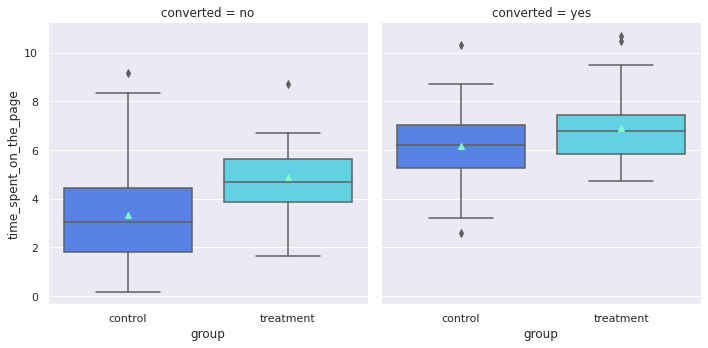

In [89]:
plt.figure(figsize=(5,3))
sns.catplot(x = 'group', y = 'time_spent_on_the_page', data = data, kind = 'box', col = 'converted', showmeans = True)
plt.show()

* The the average time spent is more for the new landing page/treatment group comparatively
* More the time the user spends on the webportal he/she is likely to subscribe, irrespective of the landing page/groups

**4. Group vs Converted vs Language preferred**

<Figure size 360x216 with 0 Axes>

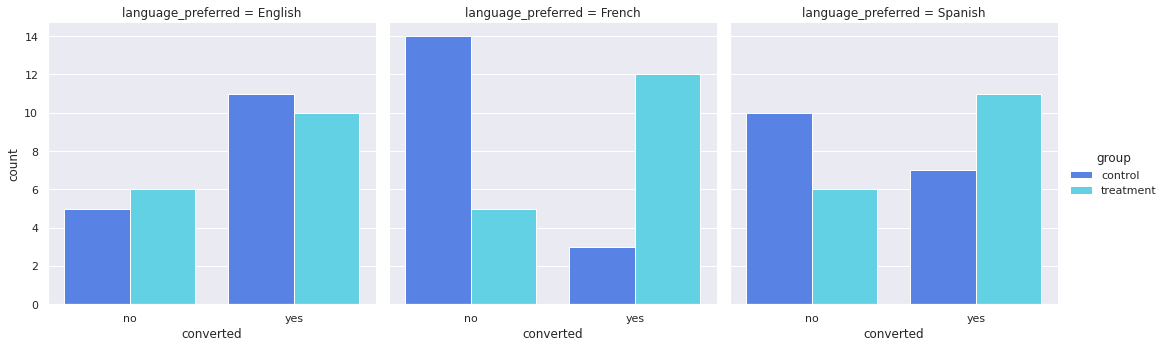

In [90]:
plt.figure(figsize = (5,3))
sns.catplot(hue = 'group', data = data, kind = 'count', col = 'language_preferred', x = 'converted')
plt.show()

* On an average, the more number of converted users seem to prefer English from both the groups
* On an average, French has the least number of subscribers from both groups
* Spanish seems to have about 50-50 conversion status

**5. Time spent vs Converted vs Language preferred**

<Figure size 360x216 with 0 Axes>

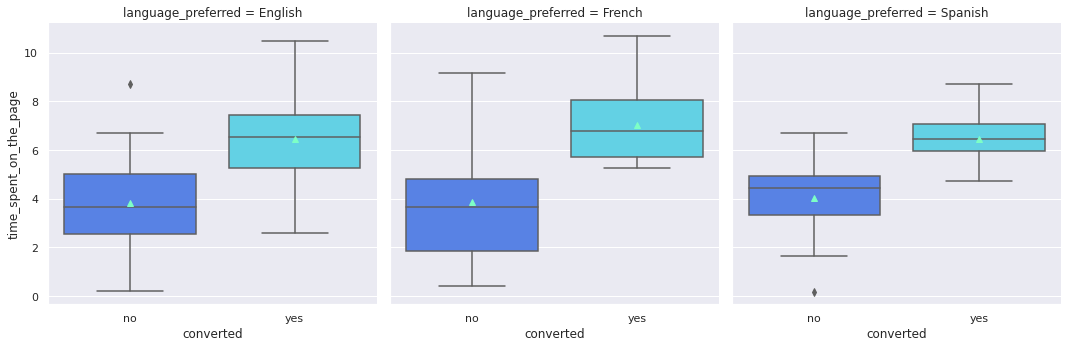

In [91]:
plt.figure(figsize = (5,3))
sns.catplot(x = 'converted', y = 'time_spent_on_the_page', data = data, col = 'language_preferred', kind = 'box', showmeans = True)
plt.show()

* The average time spent on the new landing page is higher in comparison to the old landing page, irrespective of the language preferred
* Similarly, the converted status increases with respect to the time spent on the new landing page across all three languages

**6. Landing page vs Converted vs Language preferred**

<Figure size 360x360 with 0 Axes>

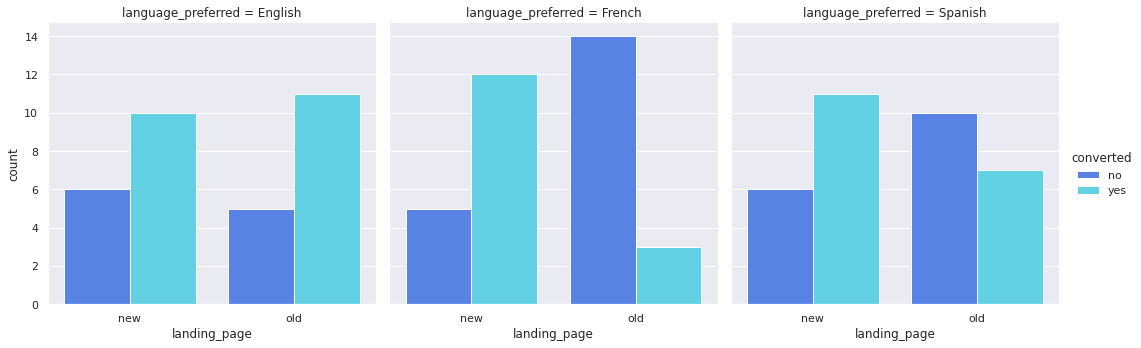

In [92]:
plt.figure(figsize = (5,5))
sns.catplot(x = 'landing_page', hue = 'converted', col = 'language_preferred', data = data, kind = 'count')
plt.show()

**New landing page**
* French users show the highest conversion rate
* Followed by Spanish and the English
* There is only a very little difference in the total number of users who converted between languages

**Old landing page**
* French users show the least conversion rate
* Followed by Spanish and then English
* The highest conversion rate for the old landing page is by the users who prefer English, followed by Spanish

# Key Insights from EDA
* The average time spent on the webportal is around 6 mins
* On an average more time is spent on the new landing page
* 54/100 users have become subscribers indicates we have subscribers from both the landing pages
* The number of users are almost the same across the three languages for both new and old landing pages
* Users' language preferrence is equal for both new and old landing pages
* On an average, larger number of subscribers prefer English language
* Least number of subscribers are French language users. However, French language depicts higher conversion ratio for the new landing page than the old landing page
* There is a 50/50 conversion chance for a Spanish language user
* Above all, the more time a user spends, he/she is likely to become a subscriber, regardless of the landing page/language preferred

# Recommendation based on EDA
Based on the above Exploratory Data Analysis, we have enough visual evidence to conclude that the business will improve with the launch of the new landing page

# Answering key questions

# Q1. Do the users spend more time on the new landing page than the old landing page?

## Statistical Analysis

**1. Defining the hypothesis**

Let,

    µ1 = time spent on the new landing page and

    µ2 = time spent on the old landing page

Testing the null hypothesis

    Ho : µ1 <= µ2

against the alternative hypothesis

    Ha : µ1 > µ2

with a level of significance 0.05

**2. Preparing the data**

In [93]:
# viewing the original dataset

data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


* we cannot use the available data directly.
* we need only two columns namely landing_page and time_spent_on_the_page to perform the test in order to answer the concerned question. Hence, we need to prepare the data for further analysis.

* 'NaN' values observed in the dataset

In [94]:
# reshaping the data using pivot() in order to perform the hypothesis test

data_timespent = data.pivot(columns = 'landing_page', values = 'time_spent_on_the_page')
data_timespent.head()

landing_page,new,old
0,NaN,3.48
1,7.13,NaN
2,4.40,NaN
3,NaN,3.02
4,4.75,NaN


* We now have the data with two columns 'new' and 'old' with the corresponding 'time_spent_on_the_page' as their values
* This data can be used for the hypothesis testing
* Nan values are also present

In [95]:
# checking the data shape

data_timespent.shape

(100, 2)

* There are 100 rows and 2 columns

In [96]:
# checking the overall information

data_timespent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   new     50 non-null     float64
 1   old     50 non-null     float64
dtypes: float64(2)
memory usage: 2.3 KB


* we have 50 observations for each of the landing page
* two columns both of type 'float
* shows 50 non-null as null values are substituted with 'NaN'

In [97]:
# checking the statistical summary of the pivot dataset

data_timespent.describe()

landing_page,new,old
count,50.000000,50.000000
mean,6.223200,4.532400
std,1.817031,2.581975
min,1.650000,0.190000
25%,5.175000,2.720000
50%,6.105000,4.380000
75%,7.160000,6.442500
max,10.710000,10.300000


* significant differnces in the mean, median and the 25% values between the two pages
* slight variations in the standard deviations

In [98]:
print('Mean time spent on the new page : ', data_timespent['new'].mean())
print('Mean time spent on the old page : ', data_timespent['old'].mean())
print('Standard deviation of time spent on the new page : ', data_timespent['new'].std())
print('Standard deviation of time spent on the old page : ', data_timespent['old'].std())

Mean time spent on the new page :  6.223199999999999
Mean time spent on the old page :  4.532400000000001
Standard deviation of time spent on the new page :  1.8170310387878263
Standard deviation of time spent on the old page :  2.581974849306046


* The sample mean and standard deviations for the time spent on the new and old landing pages are both different

**3. Identifying the right test**

From the above steps, I conclude to perform **Two Independent Sample T-test for Equality of Means - Unequal Standard Deviations**.

**4. Checking if T-test assumptions are satisifed or not**

* Continuous data - Yes, time is measured on a continuous scale.
* Normally distributed populations - Yes, since it is a quality test the populations are assumed to be normal.
* Independent populations - Yes, one group is independent of the other.
* Unequal standard deviations - Yes
* Random sampling from the population - Yes
* Hence, all the assumptions are satisified, we can use T-test for this problem.

**5. Performing the test**

In [99]:
# import the required function to perform the test

from scipy.stats import ttest_ind

In [100]:
# perform the hypothesis test 
# this test returns 2 values test-statistic and p-value

test_stat, p_value = ttest_ind(data_timespent['new'].dropna(), data_timespent['old'].dropna(), equal_var = False,
                               alternative = 'greater')                  
                                                                # dropping Nan values to perform test
                                                                # unequal variances figured in the previous steps
                                                                # mentioning the Ha as 'greater'


print('p-value : ', p_value)

p-value :  0.0001392381225166549


## Key Insights from Statistical Analysis

* As the p-value (~ 0.0001) is much lesser than the level of significance (0.05), we have enough statistical evidence to reject the null hypothesis.
* Therefore, at 5% significance level, we can conclude that the users spend more time on the new landing page than the old landing page.

## Visual Analysis

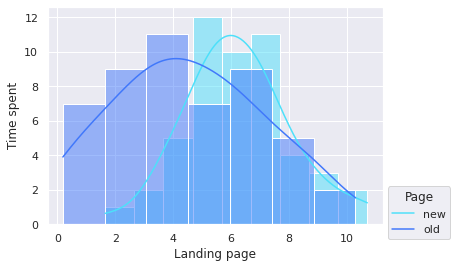

In [101]:
sns.histplot(data_timespent['new'], color = '#4DE0FA', kde = True)
sns.histplot(data_timespent['old'], color = '#4178FB', kde = True)
plt.xlabel('Landing page')
plt.ylabel('Time spent')
plt.legend( ('new', 'old'), title = 'Page',bbox_to_anchor = (1,0.2))
plt.show()

* The average time spent on the new page show a normal distribution; kde reaches a peak at 11 mins
* The average time spent on the old page is right skewed ; kde reaches a peak at around 9 mins

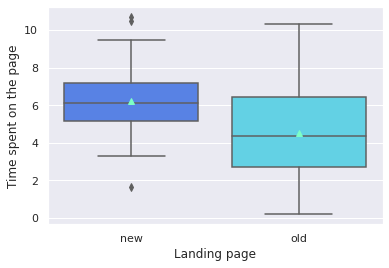

In [102]:
sns.boxplot(data = data_timespent, showmeans = True) 
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
plt.show()

**New page**
* The minimum time spent is about 3 mins and maximum time spent is around 9 mins
* Outliers spotted on both sides
* The IQR is between 5 to 7 mins
* Mean time is equal to 50th percentile

**Old page**
* The minimum time spent is close to 0 and the maximum time spent is a little above 10 mins
* No outliers
* IQR is around 3 to 6 mins
* Mean time overlaps the 50th percentile

<Figure size 504x360 with 0 Axes>

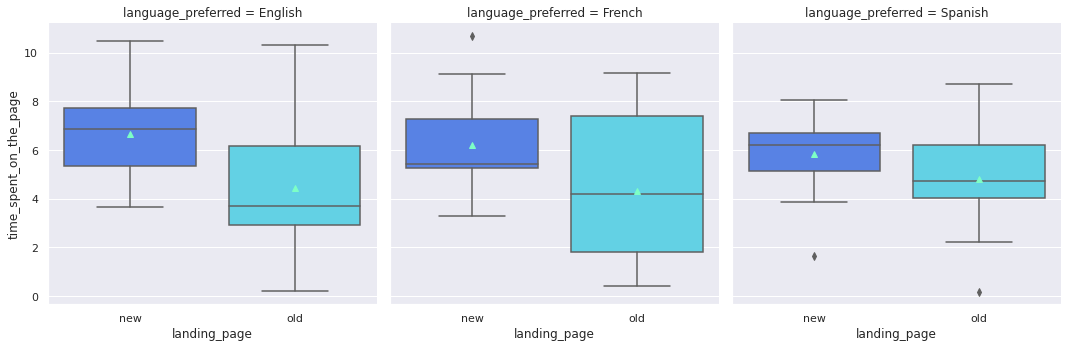

In [103]:
plt.figure(figsize = (7,5))
sns.catplot(x = 'landing_page', y = 'time_spent_on_the_page', col = 'language_preferred', data = data, kind = 'box', showmeans = True)
plt.show() 

* Mean time spent on the new landing page is around 6 minutes
* Mean time spent on the old landing page is around 5 minutes
* Mean time spent on the new landing page is higher regardless of the languages
* No outliers spotted for English language users for both new and old landing pages

## Key Insights from Visual Analysis

Hence, **we can conclude that the time spent on the new landing page is higher compared to the old landing page irrespective of the language preferred**.

## Takeaway

**Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the time spent on the new landing page is higher than the time spent on the old landing page.**

# Q2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## Statistical Analysis

**1. Defining the hypothesis**

Let,

    p1 = proportion of users who visit the new landing page and get converted

    p2 = proportion of users who visit the old landing page and get converted 

Testing the null hypothesis

    Ho : p1 <= p2

against the alternative hypothesis

    Ha : p1 > p2

with a level of significance 0.05

**2. Preparing the data**

In [104]:
# viewing the original dataset

data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


* we need to analyse only two columns from the dataset namely landing_page and converted and therefore prepare it for further testing.

In [105]:
# reshaping the data using pivot() in order to perform the hypothesis test

data_conv = data.pivot(columns = 'landing_page', values = 'converted')
data_conv.head()    # verfying the output

landing_page,new,old
0,NaN,no
1,yes,NaN
2,no,NaN
3,NaN,no
4,yes,NaN


* 'NaN' values observed

In [106]:
# checking the shape

data_conv.shape

(100, 2)

* There are 100 rows and 2 columns

In [107]:
# checking the overall information

data_conv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   new     50 non-null     category
 1   old     50 non-null     category
dtypes: category(2)
memory usage: 1.2 KB


* There are 50 observations for each
* both columns are of type 'category'
* 50 non-null in each column as the null values are substituted with 'NaN'

In [108]:
# checking for the number of coverted status for the new and old landing pages

print('Conversion count of users for the new landing page :\n', data_conv['new'].value_counts())

Conversion count of users for the new landing page :
 yes    33
no     17
Name: new, dtype: int64


In [109]:
print('Conversion count of users for the old landing page :\n', data_conv['old'].value_counts())

Conversion count of users for the old landing page :
 no     29
yes    21
Name: old, dtype: int64


**3. Identifying the right test**

From the above steps, I conclude to perform **Two Proportions Z-Test**.

**checking if np and n(1-p) values for both the landing pages are >= 10**

n = 50 # number of observations is 50 for each

p1 = 33/50 # probability of success for new landing page

p2 = 21/50 # success probability for old landing page

np1 = 33

n(1-p1) = 17

np2 = 21

n(1-p2) = 29

**4. Checking if Z-test assumptions are satisifed or not**

* Binomially distributed population - Yes, the user either becomes a subscriber or not.
* Independent populations - Yes.
* Random sampling - Yes.
* Can the binomial distribution be approximated to a Normal distribution? - Yes, the np and n(1-p) values for both samples are >= 10
* Since all the assumptions are satisfied, we can use the Z-test for this problem.

**5. Performing the test**

In [110]:
# import the required function to perform the test

from statsmodels.stats.proportion import proportions_ztest

In [111]:
conv_count = np.array([33,21]) # array of the number of converted users in both new and old landing pages
nobs = np.array([50,50])       # array of the number of observations in both new and old landing pages

# this test returns 2 values, test statistic and p-value

test_stat, p_value = proportions_ztest(conv_count, nobs, alternative = 'larger')   # mentioning the Ha as larger
print('p-value : ', p_value)

p-value :  0.008026308204056278


## Key Insights from Statistical Analysis

* As the p-value (0.008) is much lesser than the level of significance (0.05), we have enough statistical evidence to reject the null hypothesis.
* Therefore, at 5% significance level we can conclude that **the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.**

## Visual Analysis

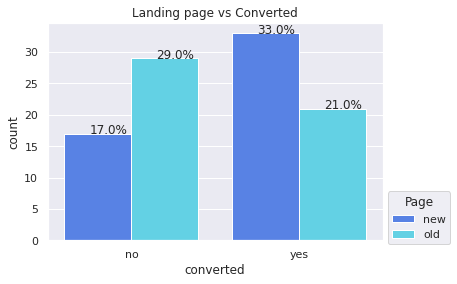

In [112]:
ax = sns.countplot(hue = 'landing_page', data = data, x = 'converted')
bar_perc(ax, data['converted'])
plt.title('Landing page vs Converted')
plt.legend(title = 'Page', bbox_to_anchor = (1,0.25))
plt.show()

**New page**
* Among 50 observations of the new landing page, about 33 users have become subscribers to the webportal.

**Old page**
* Among 50 observations of the old landing page, about 21 users have become subscribers.

<Figure size 360x360 with 0 Axes>

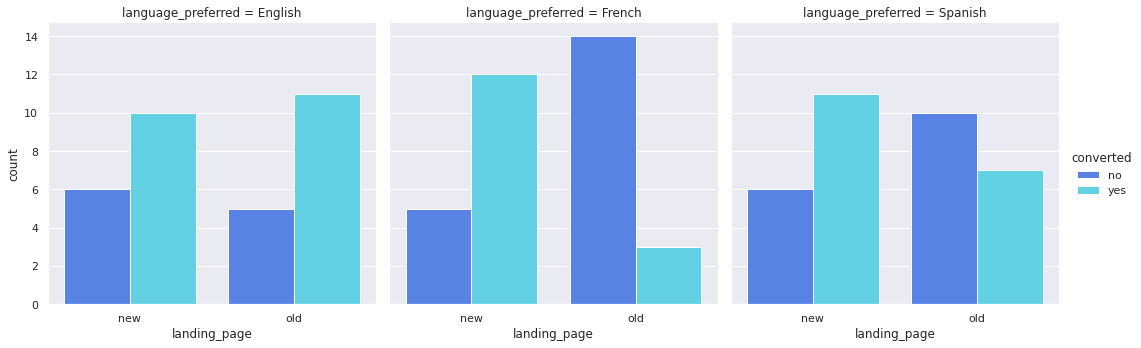

In [113]:
plt.figure(figsize = (5,5))
sns.catplot(x = 'landing_page', hue = 'converted', col = 'language_preferred', data = data, kind = 'count')
plt.show()

* The new landing page shows higher conversion status is across the three different languages

## Key Insights from Visual Analysis

* The proportion of users who visit the new landing page and get converted is greater compared to the visitors of the old landing page irrespective of the three languages.

## Takeaway

**Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page**

# Q3. Does the converted status depend on the preferred language?

## Statistical Analysis

**1. Defining the hypothesis**

Testing the null hypothesis

    Ho : Converted status is independent of language preferred

against the alternative hypothesis

    Ha : Converted status depends on language preferred

with a level of significance 0.05

**2. Preparing the data**

In [114]:
# viewing the original dataset

data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


* We cannot use the data directly
* We need only two columns namely 'converted' and 'language preferred' to perform the test
* Also, we need them to be in the form of a contingency table to perform the test of independence. Hence, we manipulate the dataset

In [115]:
# converting the dataset into a contingency table using the crosstab()

data_cont = pd.crosstab(data['converted'], data['language_preferred'])
data_cont

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


* Now, we have a contingency table with language preferred as columns and the conversion status as the rows
* The table gives an idea as to how many users have become subscriber w.r.t. the language preferred

**3. Identifying the right test**

As the question is to determine if the converted status depends on the language preferred, I conclude to perform the **Chi-Square Test for Independence**.

**4. Checking if the assumptions for the test are satisifed or not**

* Categorical variable - Yes, both language preferred and converted status are categorical.
* Expected value of the number of sample observations in each level of the variable is atleast 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes.
* Since the assumptions are all satisfied, we can apply the Chi-Square Test for Independence.

**5. Performing the test**

In [116]:
# import the required function to perform the test

from scipy.stats import chi2_contingency

In [117]:
# this test returns 4 values - test statistic, p-values, degrees of freedom and the expected frequency

chi, pval, dof, exp_freq = chi2_contingency(data_cont)  # passing the contingency table as the argument to perform the test
print('p-value : ', pval)

p-value :  0.21298887487543447


## Key Insights from Statistical Analysis

* As the p-value (~0.213) is much greater than the level of significance (0.05), we fail the reject the null hypothesis. Therefore we can conclude that **the converted staus is independent of the language preferred**.

## Visual Analysis

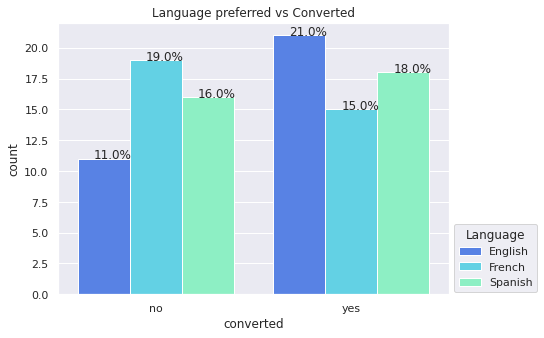

In [118]:
plt.figure(figsize=(7,5))
ax = sns.countplot(hue = 'language_preferred', data = data, x = 'converted')
bar_perc(ax, data['converted'])
plt.title('Language preferred vs Converted')
plt.legend(title = 'Language', bbox_to_anchor = (1,0.28))
plt.show()

* we can see the conversion rate against the language preferred
* the conversion rate of the users preferring English is the highest followed by Spanish and then French
* users preferring French seems to have the lowest conversion rate followed by Spanish and then English
* the conversion rate for Spanish is alomst 50 - 50

<Figure size 504x360 with 0 Axes>

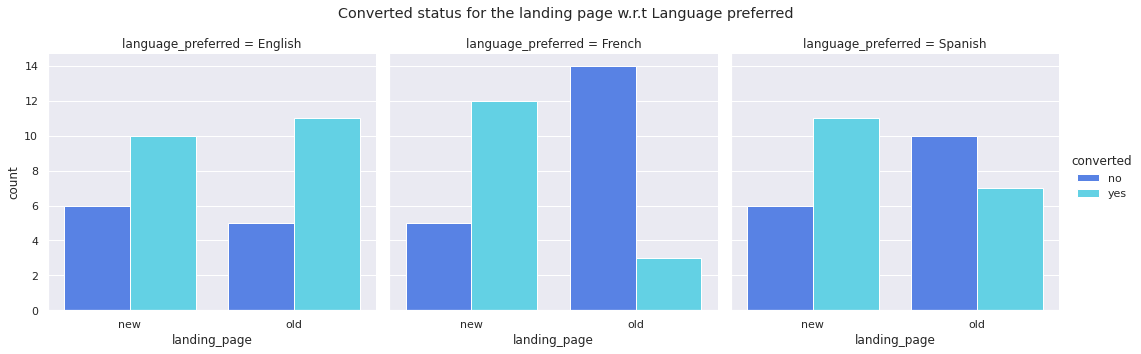

In [119]:
plt.figure(figsize = (7,5))
ct = sns.catplot(x = 'landing_page', hue = 'converted', col = 'language_preferred', data = data, kind = 'count')
ct.fig.subplots_adjust(top=0.85)           # adjusting the catplot to display the title
plt.suptitle('Converted status for the landing page w.r.t Language preferred') # giving a title to the catplot
plt.show()

* Significant increase in the converted status of new landing page both Spanish and French languages
* Although, the more number of converted users seem to prefer English there does not seem to much difference in terms of the landing pages
* Spanish seems to have almost equal numbers for the conversion count on an average
* French language has the least number of converted users overall. However, it depicts the highest conversion ratio for the new landing page comparatively.

## Key Insights from Visual Analysis

**Spanish**
* overall 18 users have subscribed to the newsportal whereas 16 have not
* very little difference in numbers
* but, the number of users who have converted w.r.t new landing page is almost equal to the number of user not converted w.r.t old landing page and vice versa

**English**
* overall 21 users have subscribed whereas 11 have not
* significant difference in the subscribers count but almost equal number of subscribers for both the new and ols landing pages

**French**
* overall only 15 have subscribed whereas 19 have not
* however, it has the highest conversion rate for the new landing page when compared to English and Spanish

Hence, from the above visual analysis, **we can conclude that the conversion rate is independent of the language preferred**.

## Takeaway

**Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the conversion rate is independentof the language preferred.**

# Q4. Is the mean time spent on the new page same for the different language users?

## Statistical Analysis

**1. Defining the hypothesis**

Testing the null hypothesis

    Ho : The mean time spent on the new landing page w.r.t the languages are all equal

against the alternative hypothesis

    Ha : The mean time spent w.r.t. atleast one of the three languages is different

with a level of significance 0.05

**2. Preparing the data**

In [120]:
# viewing the dataset

data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [121]:
# as we need to analyse the data in w.r.t. the new landing page, we manipualte the original data

new_pg = data[data['landing_page']=='new']   # creating a new df new_pg 
new_pg.head()      # viewing the top 5 rows of new_pg

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [122]:
# checking the shape of new_pg 

new_pg.shape  

(50, 6)

* There are 50 rows and 6 columns

In [123]:
# checking the number of observations for each language

new_pg['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

* 17 observations each for French and Spanish
* 16 observations for English

In [124]:
# finding the mean time spent on the page based on the language

new_pg.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

The mean values are quite close to one another

**3. Identifying the right test**

* The question is based on the mean time spent on the new page by three different language users. Basically it is a test for means for more than two populations, I conclude to perform the **One-way ANOVA F-test**.

**4. Checking if test assumptions are satisifed or not**

* The normality and equality of variance assumptions are checked below for the response variable time_spent_onthe page.

### Normality check with Shapiro-Wilk'sTest

Testing the null hypothesis

    Ho : Time spent follows normal distribution

against the alternative hypothesis

    Ha : Time spent does not follow normal distribution

with a level of significance 0.05

In [125]:
# import the required function 

from scipy.stats import shapiro

In [126]:
test_stat, p_value = shapiro(new_pg['time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.8040016293525696


* Since the p-value (0.80) is much larger than the level of significance (0.05), we fail to reject the null hypothesis. Hence, the response variable (time spent on the page) follows a normal distribution.

### Equality check with Levene's Test

Testing the null hypothesis

    Ho : All the population variances are equal

against the alternative hypothesis

    Ha : Atleast one variance is different from the rest

In [127]:
# import the required function

from scipy.stats import levene

In [128]:
# this test returns two values - test statistic and p-value

test_stat, p_value = levene(new_pg['time_spent_on_the_page'][new_pg['language_preferred']=='English'],
                            new_pg['time_spent_on_the_page'][new_pg['language_preferred']== 'French'],
                            new_pg['time_spent_on_the_page'][new_pg['language_preferred']=='Spanish'])
print('p-value : ', p_value)

p-value :  0.46711357711340173


* Since the p-value (~ 0.47) is greater than the level of significance (0.05) we fail to reject the null hypothesis. Hence, the variances for all the response variables are equal.

**5. Checking if ANOVA test assumptions are satisifed or not**

* The populations are normally distributed - Yes, it is verified using the Shapiro-Wilk's test.
* Population variances are equal - Yes, the homogeneity of varaince assumption is verified using the Levene's test.
* Independent random samples - Yes.
* As all the assumptions are staisfied, we can perform the One-way ANOVA F test.

**6. Performing the test**

In [129]:
# importing the required function

from scipy.stats import f_oneway

In [130]:
test_stat, p_value = f_oneway(new_pg.loc[new_pg['language_preferred']=='English','time_spent_on_the_page'],
                              new_pg.loc[new_pg['language_preferred']=='French','time_spent_on_the_page'],
                              new_pg.loc[new_pg['language_preferred']=='Spanish','time_spent_on_the_page'])
print('p-value : ', p_value)

p-value :  0.43204138694325955


* As the p-value (~ 0.43) is much greater than 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence that **the mean time spent on the new page for the different language users are all equal**.

## Visual Analysis

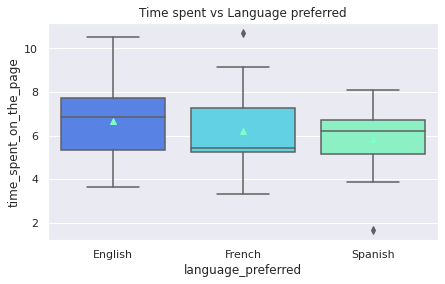

In [131]:
plt.figure(figsize = (7,4))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = new_pg, showmeans = True)
plt.title('Time spent vs Language preferred')
plt.show()

* The IQR of the time spent is almost same for both English and French, about 4 to 7 mins
* The IQR for Spanish is about 5 to 7 minutes
* The 1st quartile time is around 5 mins for all three languages
* The values of the mean time spent by different language users look quite close to one another
* Outliers spotted for Spanish alone

<Figure size 504x360 with 0 Axes>

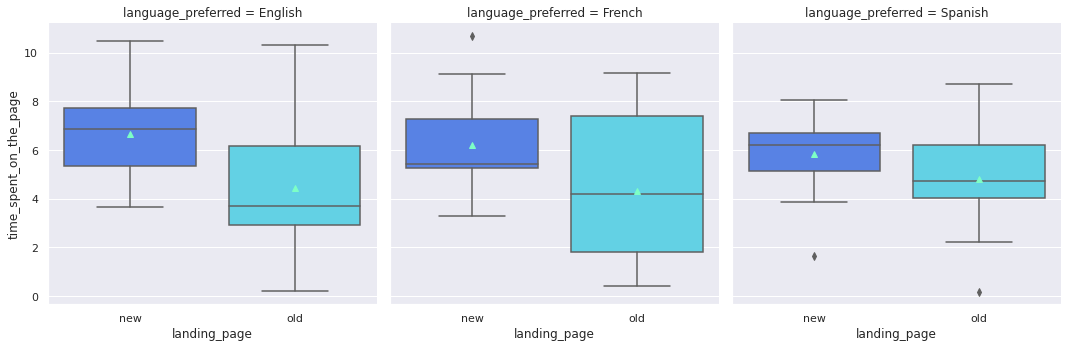

In [132]:
plt.figure(figsize = (7,5))
sns.catplot(x = 'landing_page', y = 'time_spent_on_the_page', col = 'language_preferred', data = data, kind = 'box', showmeans = True)
plt.show()

* The mean time spent on the new landing page for all three languages is between 6 to 7 mins
* The mean time spent on the old landing page for different languages is between 5 to 6 mins
* No outliers spotted for English language users for both new and old landing pages

## Key Insights from Visual Analysis

* Although the range of time spent differs between languages, the values of the mean time spent are significantly closer. Hence, from the above visual analysis we can concude that **the mean time spent on the new page for the different language users are almost equal**.

## Takeaway

**Based on the observations from both the statistical and visual analysis of the given data, we have enough evidence to prove that the mean time spent on the new page for the different language users are same.**

# Conclusion

From the statistical and visual analysis performed, we can conclude that at a 5% significance level . . .

* The users spend more time on the new landing page than the old landing page

* The conversion rate for the new page is greater than the conversion rate for the old page

* The converted status does not depend on the language preferred

* The mean time spent on the new page is the same for the different language users

**All things considered, there is enough statistical and visual evidence to prove that the business would improve significantly with the launch of the new landing page.**